In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from keras.models import Model
from keras.models import load_model
from keras.layers import Average
from sklearn.metrics import accuracy_score

In [2]:
epochs = 10

In [3]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

train_data = np.array(train, dtype = 'float32')
test_data = np.array(test, dtype='float32')


In [4]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 
               'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

def save_list_to_txt(lst, filename):
    with open(filename, 'w') as file:
        for item in lst:
            file.write(str(item) + '\n')

# Call the function to save the list to a .txt file
save_list_to_txt(class_names, "output.txt")


Label for the image is:  R


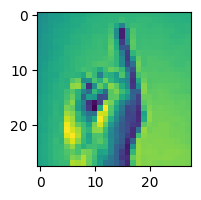

In [5]:
#plot a few images and labels
i = random.randint(1,train.shape[0])
fig1, ax1 = plt.subplots(figsize=(2,2))
plt.imshow(train_data[i,1:].reshape((28,28))) 
print("Label for the image is: ", class_names[int(train_data[i,0])])

Text(0.5, 1.0, 'Label')

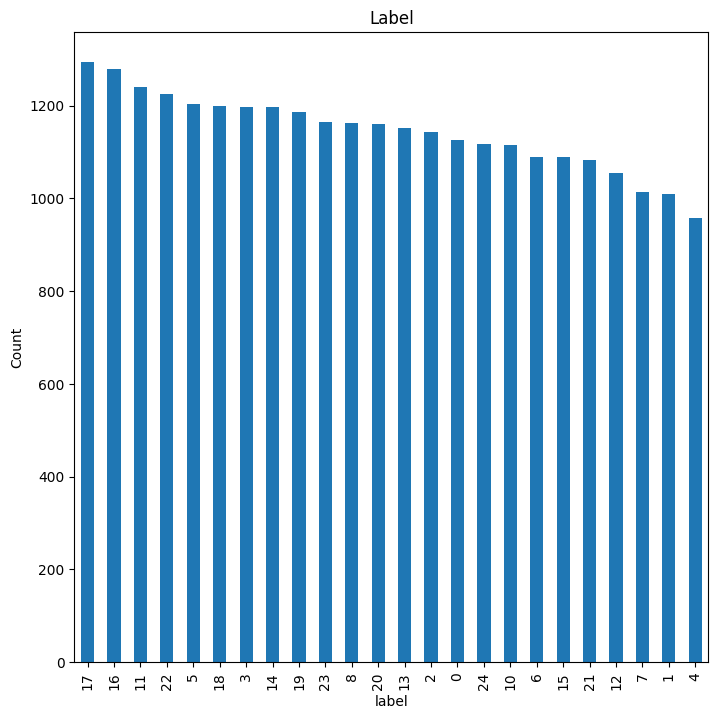

In [6]:
# Data distribution visualization

fig = plt.figure(figsize=(18,18))
ax1 = fig.add_subplot(221)
train['label'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Label')

In [7]:
#Normalize / scale X values
X_train = train_data[:, 1:] /255.
X_test = test_data[:, 1:] /255.

In [8]:

y_train = train_data[:, 0]
y_train_cat = to_categorical(y_train, num_classes=25)

y_test = test_data[:,0]
y_test_cat = to_categorical(y_test, num_classes=25)

In [9]:
#Reshape for the neural net

X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [19]:
model = Sequential()


model.add(Conv2D(64, kernel_size =3,activation ='relu',padding ='same',name ='conv1_1',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size =3,activation ='relu',padding ='same',name ='conv1_2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,name ='pool1_1'))
model.add(Dropout(0.3,name ='drop1_1'))

model.add(Conv2D(128,kernel_size =3,activation ='relu',padding ='same',name ='conv2_1'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size =3,activation ='relu',padding ='same',name ='conv2_2'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size =3,activation ='relu',padding ='same',name ='conv2_3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,name='pool2_1'))
model.add(Dropout(0.3,name ='drop2_1'))

model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv3_1'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv3_2'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv3_3'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv3_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2),strides =2,name='pool3_1'))
model.add(Dropout(0.3,name ='drop3_1'))

model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv4_1'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv4_2'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv4_3'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size =3,activation ='relu',padding ='same',name ='conv4_4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,name='pool4_1'))
model.add(Dropout(0.3,name='drop4_1'))

model.add(Conv2D(512,kernel_size =3,activation ='relu',padding ='same',name ='conv5_1'))
model.add(BatchNormalization())
model.add(Conv2D(512,kernel_size =3,activation ='relu',padding ='same',name ='conv5_2'))

model.add(Conv2D(512,kernel_size =3,activation ='relu',padding ='same',name ='conv5_3'))
model.add(BatchNormalization())
model.add(Conv2D(512,kernel_size =3,activation ='relu',padding ='same',name ='conv5_4'))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size =2,strides=2,name ='pool5_1'))
model.add(Dropout(0.3,name='drop5_1'))

model.add(Flatten(name ='flatten'))

model.add(Dense(units =128,activation='relu',name ='input'))
model.add(Dense(units=25,activation='softmax' ,name ='output'))



In [20]:
model.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1_1 (Conv2D)            (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_32 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 conv1_2 (Conv2D)            (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_33 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 pool1_1 (MaxPooling2D)      (None, 14, 14, 64)        0         
                                                                 
 drop1_1 (Dropout)           (None, 14, 14, 64)       

In [48]:
history0 = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 100, verbose = 1, validation_data = (X_test, y_test_cat))

In [23]:
model.save('saved_models/model_sld.hdf5')

In [51]:
#Model 1

#Defining the CNN

model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(25, activation = 'softmax'))


In [52]:
model1.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [53]:
history1 = model1.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

Epoch 1/10
215/215 [==============================] - 4s 13ms/step - loss: 2.6406 - acc: 0.1928 - val_loss: 1.6443 - val_acc: 0.5307
Epoch 2/10
215/215 [==============================] - 2s 11ms/step - loss: 1.1621 - acc: 0.6098 - val_loss: 0.8650 - val_acc: 0.7167
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.6413 - acc: 0.7785 - val_loss: 0.5268 - val_acc: 0.8182
Epoch 4/10
215/215 [==============================] - 2s 11ms/step - loss: 0.4156 - acc: 0.8602 - val_loss: 0.4158 - val_acc: 0.8532
Epoch 5/10
215/215 [==============================] - 2s 10ms/step - loss: 0.2784 - acc: 0.9066 - val_loss: 0.2999 - val_acc: 0.9018
Epoch 6/10
215/215 [==============================] - 2s 11ms/step - loss: 0.1942 - acc: 0.9347 - val_loss: 0.3000 - val_acc: 0.9063
Epoch 7/10
215/215 [==============================] - 2s 10ms/step - loss: 0.1437 - acc: 0.9531 - val_loss: 0.2555 - val_acc: 0.9253
Epoch 8/10
215/215 [==============================] - 2s 10ms/step - 

In [14]:
model1.save('saved_models/model1.hdf5')

In [15]:
#Model2

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(25, activation = 'softmax'))

model2.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model2.summary()

history2 = model2.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model2.save('saved_models/model2.hdf5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          36928     
                                                      

In [16]:
#Model 3
#
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(25, activation = 'softmax'))

model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
model3.summary()

history3 = model3.fit(X_train, y_train_cat, batch_size = 128, epochs = epochs, verbose = 1, validation_data = (X_test, y_test_cat))

model3.save('saved_models/model3.hdf5')


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [12]:
model0 = load_model('saved_models/model0.hdf5')
model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

models = [model0 ,model1, model2, model3]

preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
summed = np.sum(preds, axis=0)

225/225 [==============================] - 1s 2ms/step


In [13]:
prediction0 = model0.predict(X_test)
prediction1 = model1.predict(X_test)
prediction2 = model2.predict(X_test)
prediction3 = model3.predict(X_test)

label_prediction0 = np.argmax(prediction0, axis=1)
label_prediction1 = np.argmax(prediction1, axis=1)
label_prediction2 = np.argmax(prediction2, axis=1)
label_prediction3 = np.argmax(prediction3, axis=1)


accuracy0 = accuracy_score(y_test, label_prediction0)
accuracy1 = accuracy_score(y_test, label_prediction1)
accuracy2 = accuracy_score(y_test, label_prediction2)
accuracy3 = accuracy_score(y_test, label_prediction3)

accuracy0,accuracy1,accuracy2,accuracy3

225/225 [==============================] - 0s 2ms/step


(0.9920524261015059,
 0.9373954266592304,
 0.8759063022866704,
 0.9259620747350809)

In [14]:
models = [model0,model1, model2, model3]
preds1 = [model.predict(X_test) for model in models]
preds1=np.array(preds1)

results = []
for w0 in range(0, 5):
    for w1 in range(0, 5):
        for w2 in range(0, 5):
            for w3 in range(0, 5):
                wts = [w0/10.,w1/10., w2/10., w3/10.]
                wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
                wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
                weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
                results.append({'wt0': wts[0], 'wt1': wts[1], 'wt2': wts[2],'wt3': wts[3], 'acc': weighted_accuracy * 100})

df = pd.DataFrame(results)

max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row['acc'], " obtained with w0=",max_acc_row['wt0'],"w1=", max_acc_row['wt1'],
      " w2=", max_acc_row['wt2'], " and w3=", max_acc_row['wt3'])


225/225 [==============================] - 0s 2ms/step
Max accuracy of  99.24707194645845  obtained with w0= 0.3 w1= 0.0  w2= 0.2  and w3= 0.0


In [15]:
models = [model0,model1, model2, model3]
preds = [model.predict(X_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.6, 0.1, 0.2 , 0.1] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)
ideal_weighted_accuracy

225/225 [==============================] - 0s 2ms/step


0.9917735638594535

In [16]:


# weights =[0.6, 0.1, 0.2 , 0.1]  or use ideal_weights
weights = ideal_weights
inputs = [] 
outputs = []
model0 = load_model('saved_models/model0.hdf5')
model1 = load_model('saved_models/model1.hdf5')
model2 = load_model('saved_models/model2.hdf5')
model3 = load_model('saved_models/model3.hdf5')

for i , model in enumerate([model0,model1, model2, model3]):
    inputs.append(model.input)
    outputs.append(model.output*weights[i])


ensemble_output = Average()(outputs)

# Create ensemble model
ensemble_model = Model(inputs=inputs, outputs=ensemble_output)

# Save the ensemble model to an HDF5 file
ensemble_model.save("saved_models/ensemble_model2.hdf5")

ValueError: The name "flatten" is used 2 times in the model. All layer names should be unique.

In [17]:
# Recompile the model with metrics
ensemble_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ensemble_model.save("saved_models/ensemble_model.hdf5")

NameError: name 'ensemble_model' is not defined

## Testing Model

In [18]:
model_sld = load_model('saved_models/Model_SLD.hdf5')

In [19]:
prediction_sld = model_sld.predict(X_test)

225/225 [==============================] - 3s 12ms/step


In [20]:
label_prediction_sld = np.argmax(prediction_sld, axis=1)
accuracy_sld = accuracy_score(y_test, label_prediction_sld)

In [21]:
accuracy_sld

0.9920524261015059

## MODEL DETAILS

In [22]:
history_df = pd.DataFrame(history1.history)
history_df.loc[:, ['acc', 'val_acc']].plot()

NameError: name 'history1' is not defined

<Axes: >

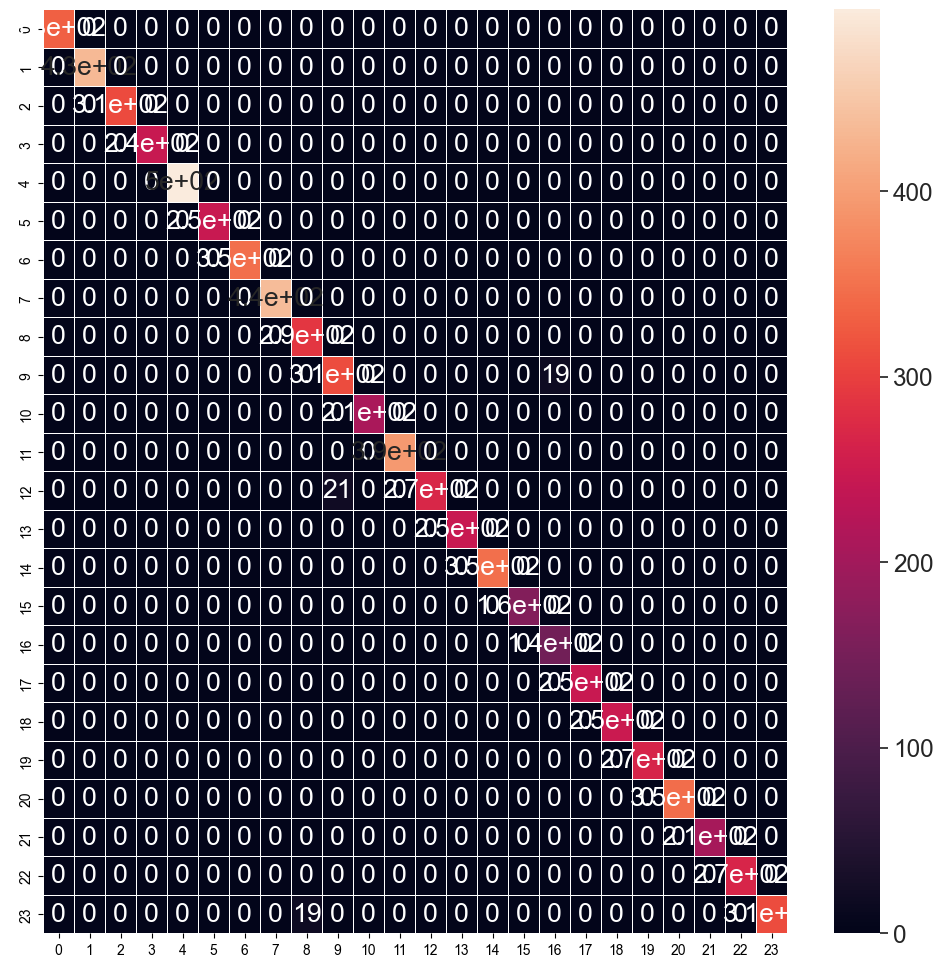

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)
fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

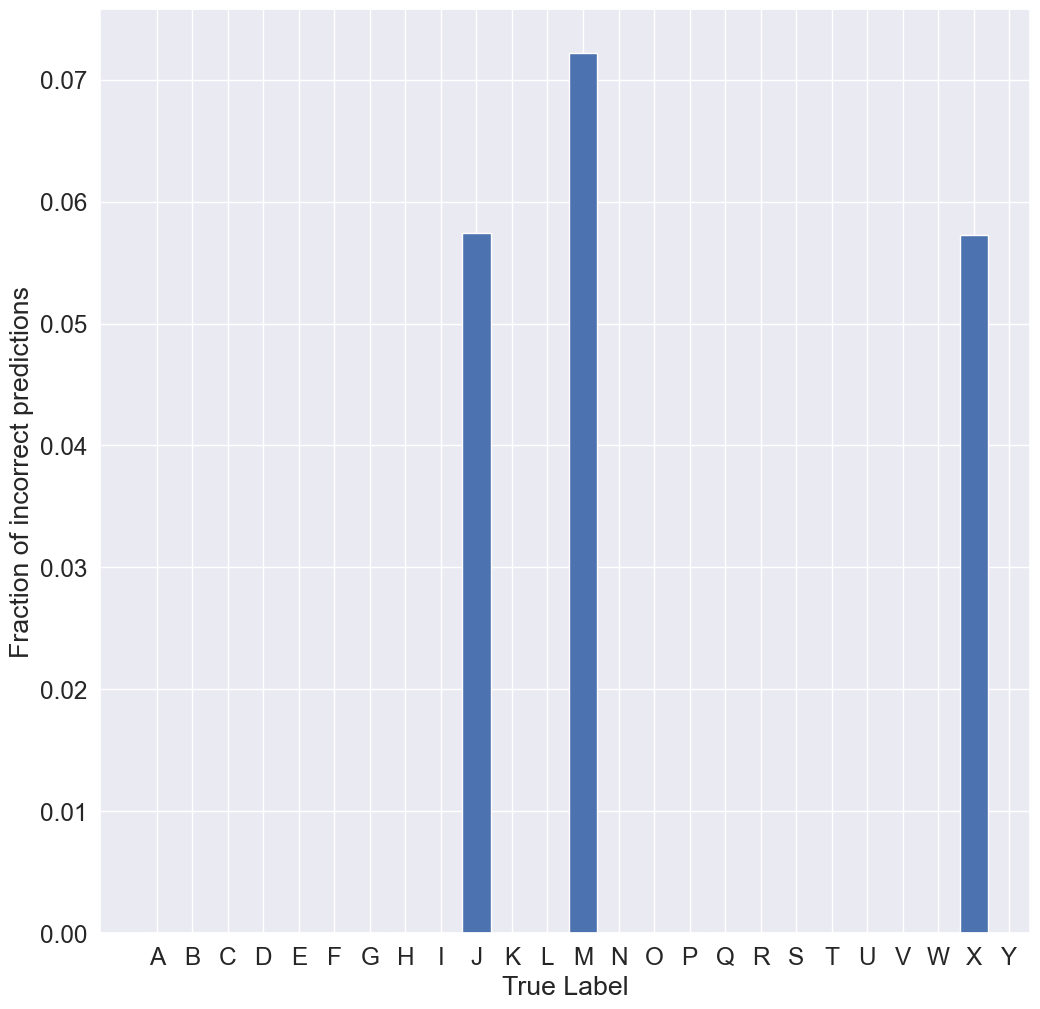

In [24]:
# Plot incorrect values

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(24), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
x=plt.xticks(np.arange(25), class_names)